# Bikes Sharing Assignment

## Introduction
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Exploratory Data Analysis

In [2]:
data=pd.read_csv('day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.shape

(730, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Note : Every column has 730 non-null values which implies absence of null values in any column and Dtype is consistent with standard format for that column

Note: Certain columns needs to be removed/dropped as they are not relevant for analysis

1)dteday which is date is not at the required granularity to be analyzable for problem at hand

2)Casual and registered are components of cnt which aggreagation of both. So they can be dropped

In [7]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [8]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Renaming columns and substitution for numerical encoding

In [9]:
data.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['month']=data.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist and Cloudy',3:'Light Snow',4:'Snow and Fog'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,January,0,Sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


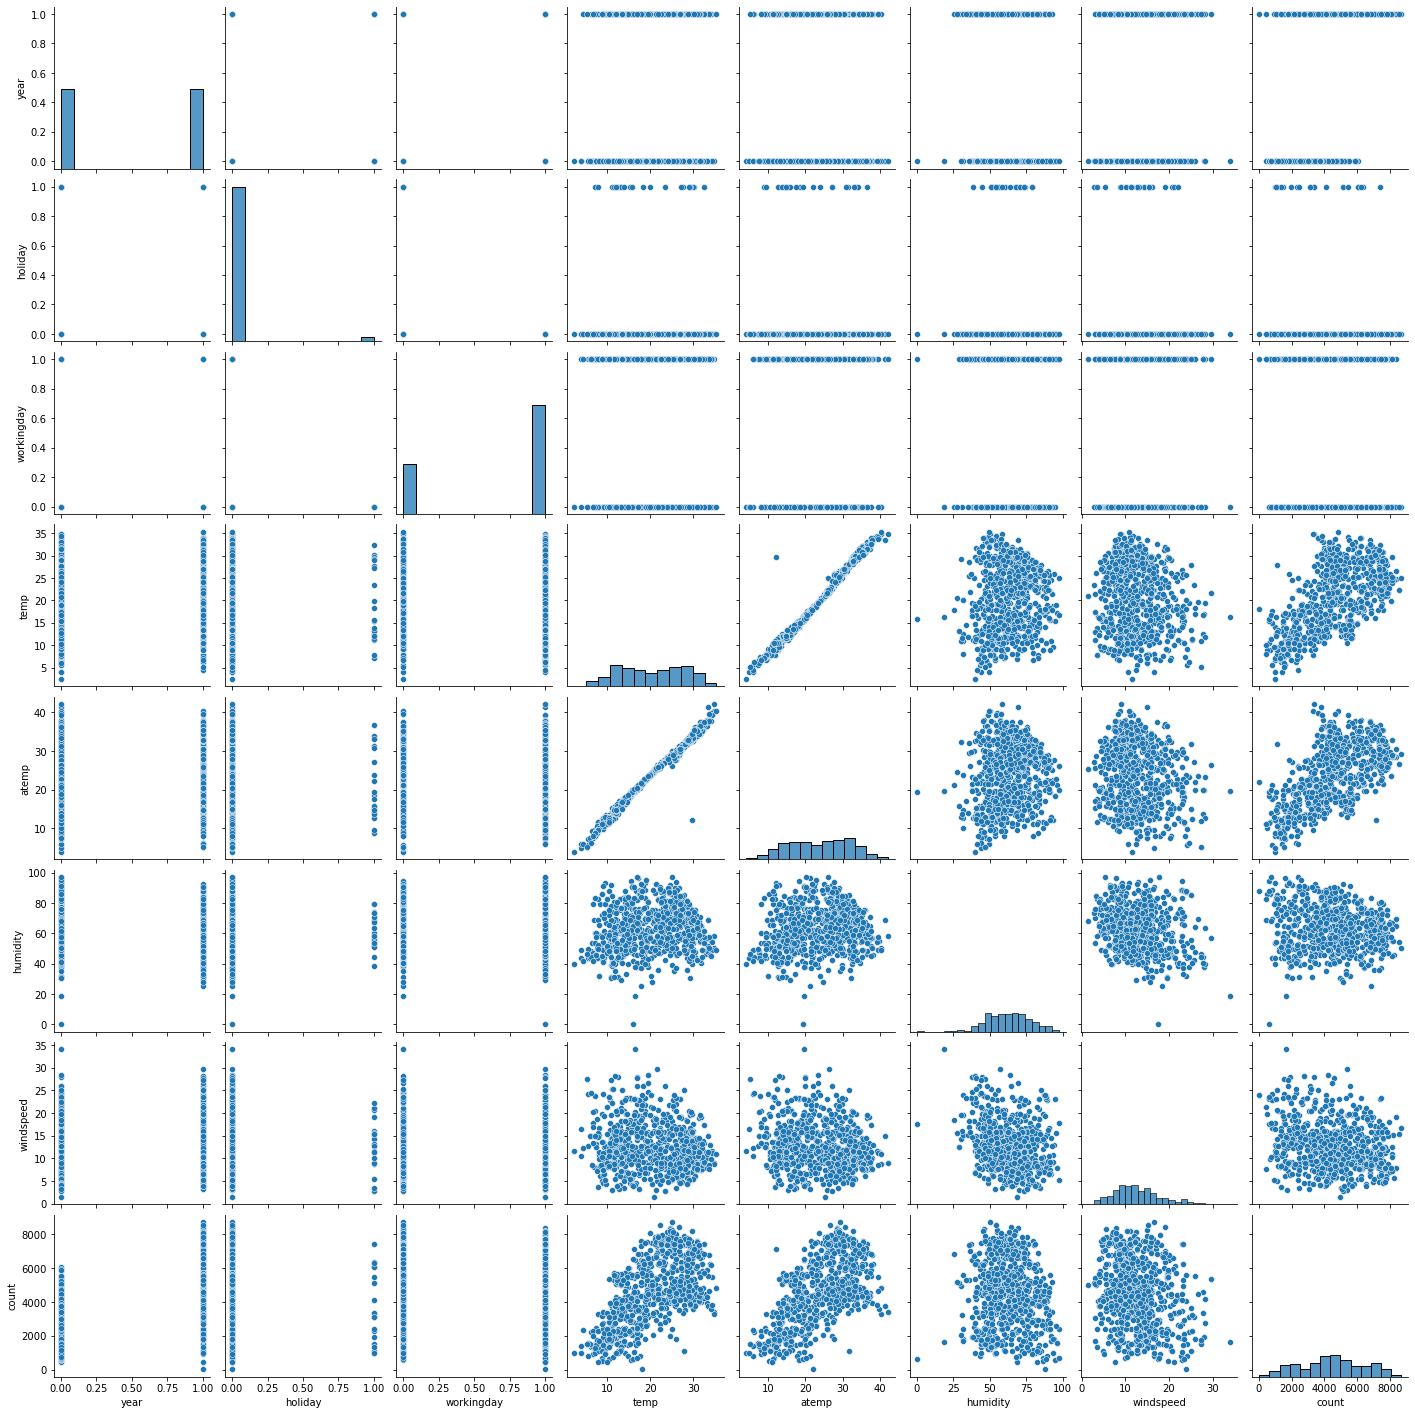

In [11]:
sns.pairplot(data)

Note : It can be clearly seen than temp and atemp are highly correlated. So atemp can be removed

In [12]:
data.drop(['atemp'],axis=1,inplace=True)

In [13]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,January,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Data Visualisation

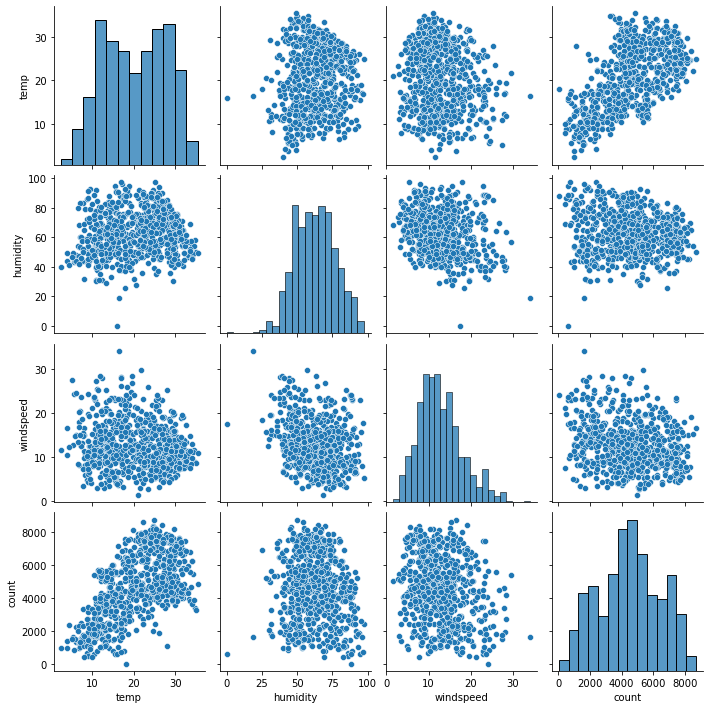

In [14]:
sns.pairplot(data, vars=["temp", "humidity",'windspeed','count'])
plt.show()

Note : Temeperature and count seem to be positively correlated from above scatter plots

<AxesSubplot:xlabel='season', ylabel='count'>

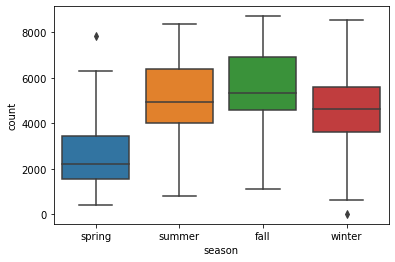

In [15]:
sns.boxplot(x=data['season'],y=data['count'])

Note: Bike rentals are less in spring compared to summer and fall. They are highest in fall at a meadian level

<AxesSubplot:xlabel='year', ylabel='count'>

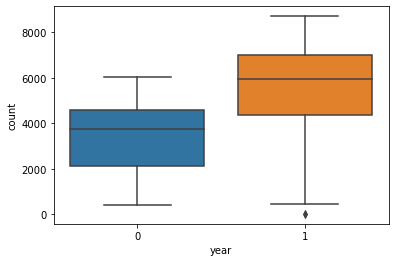

In [16]:
sns.boxplot(x=data['year'],y=data['count'])

Note: Bike rentals are higher in 2019 than 2018

<AxesSubplot:xlabel='workingday', ylabel='count'>

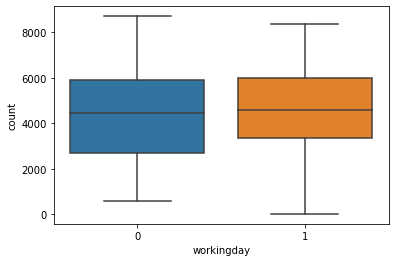

In [17]:
sns.boxplot(x=data['workingday'],y=data['count'])

Note: Bike Rentals doesn't to vary much depending on whether a day is working day or not but here as working days are more compared to non working days it can be inferred that demand per non working day is more

<AxesSubplot:xlabel='weathersit', ylabel='count'>

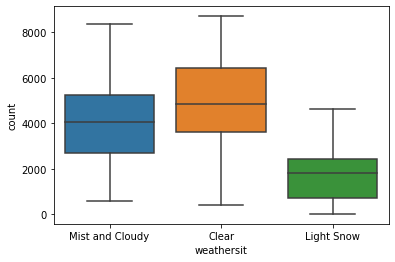

In [18]:
sns.boxplot(x=data['weathersit'],y=data['count'])

Note : Weather conditions impact bike rentals significantly as expected and Light Snow conditions decrease bike rental demand

<AxesSubplot:xlabel='month', ylabel='count'>

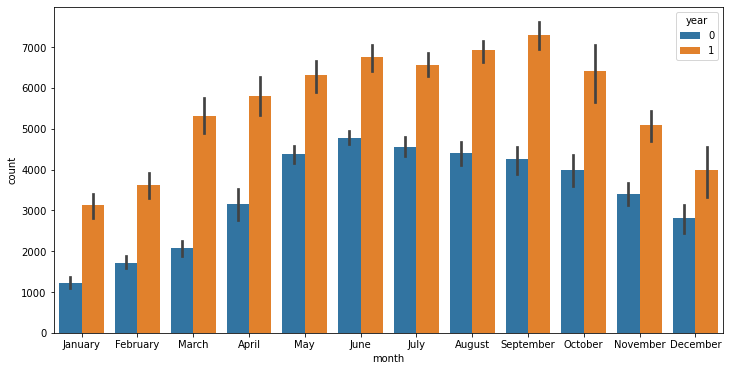

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',hue='year',data=data)

Note: Bike Rentals generally tend to maximize around year mid and taper of at start and end

<AxesSubplot:>

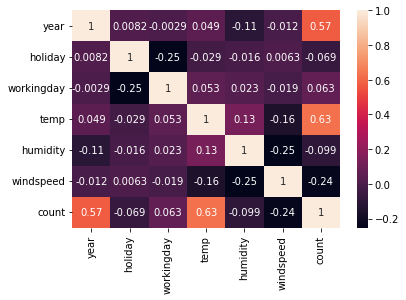

In [20]:
sns.heatmap(data.corr(),annot=True)

Note: Ignoring categorical variables total rentals are highly correlated with temperature 

# Linear Regression

## Data preparation

In [21]:
#Drop month as season is being used and also drop weekday as workingday is better for analysis
data.drop(['month','weekday'],axis=1,inplace=True)
fin_res = pd.get_dummies(data=data,columns = ['season','weathersit'], drop_first=True)


In [22]:
fin_res

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist and Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0


### Test and Train Split

In [23]:
# Data should be split into two sets, one which will used for building the model and other which is used for testing model
# General practice is to do it in .8,.2 or .7,.3train,test values
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(fin_res,train_size=0.7,random_state=42)
print(train_data.shape)
print(test_data.shape)

(510, 12)
(220, 12)


### Feature Scaling

In [24]:
# Scaling helps in better prediction of coefficients and MinMax scaler also takes care of outliers. So MinMax scaler is used.
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
train_data[['temp','humidity','windspeed','count']]=min_max.fit_transform(train_data[['temp','humidity','windspeed','count']])
train_data.head()
test_data[['temp','humidity','windspeed','count']]=min_max.transform(test_data[['temp','humidity','windspeed','count']])

### Splitting into dependant and independant variables

In [25]:
y_train = train_data.pop('count')
X_train = train_data

### Linear regression model building

In [26]:
import statsmodels.api as sm

In [27]:
# Adding a constant and creating a model
X_train_ct=sm.add_constant(X_train)
fin_model=sm.OLS(y_train,X_train_ct).fit()

In [28]:
# model parameters

fin_model.params

const                         0.259410
year                          0.238163
holiday                      -0.071370
workingday                    0.017851
temp                          0.484693
humidity                     -0.136486
windspeed                    -0.124319
season_spring                -0.115191
season_summer                 0.035788
season_winter                 0.086065
weathersit_Light Snow        -0.223690
weathersit_Mist and Cloudy   -0.056511
dtype: float64

In [29]:
# model summary
fin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.88e-177
Time:                        01:14:07   Log-Likelihood:                 453.94
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     498   BIC:                            -833.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2594      0.042      6.209      0.000       0.177       0.341
year                           0.2382      0.009     26.355      0.000       0.220       0.256
holiday                       -0.0714      0.028     -2.531      0.012      -0.127      -0.016
workingday                     0.0179      0.010      1.816      0.070      -0.001       0.037
temp                           0.4847      0.037     13.209      0.000       0.413       0.557
humidity                      -0.1365      0.042     -3.261      0.001      -0.219      -0.054
windspeed                     -0.1243      0.026     -4.712      0.000      -0.176      -0.072
season_spring                 -0.1152      0.023     -5.117      0.000      -0.159      -0.071
season_summer                  0.0358      0.014      2.525      0.012       0.008       0.064
season_winter                  0.0861      0.018      4.894      0.000       0.052       0.121
weathersit_Light Snow         -0.2237      0.030     -7.528      0.000      -0.282      -0.165
weathersit_Mist and Cloudy    -0.0565      0.012     -4.831      0.000      -0.079      -0.034
==============================================================================
Omnibus:                       59.296   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.117
Skew:                          -0.657   Prob(JB):                     1.12e-27
Kurtosis:                       5.029   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes
1) Our model seems to be working well with adjusted R2 of .83, but this alone doesn't imply a best model
2) No feature seems to have p value greater than .05 which implies all coeffiecients are significant
3) But multicollinearity assumption needs to be cross checked by computing VIF
4) Even though workingday p value is 0.07, it is not a significant deviation and hypothesis can be framed to validate it. So it doesn't need to be removed

In [30]:
# Calculation of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

fact = pd.DataFrame()
X = X_train_ct
fact['Features'] = X.columns
fact['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
fact['VIF'] = round(fact['VIF'], 2)
fact = fact.sort_values(by = "VIF", ascending = False)
fact

,Features,VIF
0,const,88.06
7,season_spring,4.55
4,temp,3.50
9,season_winter,2.92
8,season_summer,1.94
5,humidity,1.82
11,weathersit_Mist and Cloudy,1.56
10,weathersit_Light Snow,1.27
6,windspeed,1.21
3,workingday,1.08


Note)
Except constant every independant varible has a VIF of less than 5 which is optimal and doesn't require any more feature removal

## Residual Analysis

In [31]:
y_train_pred = fin_model.predict(X_train_ct)

Text(0.5, 0, 'Errors')

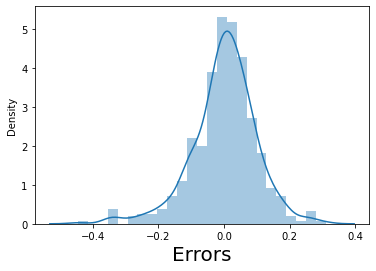

In [32]:
sns.distplot((y_train - y_train_pred),bins=25) 
plt.xlabel('Errors', fontsize = 20)

Note)
It can be seen that errors are distributed normally which is important assumption for Linear regression model

### Predictions using our model

In [33]:
y_test = test_data.pop('count')
X_test = test_data

In [34]:
X_test_ct=sm.add_constant(X_test)
y_pred=fin_model.predict(X_test_ct)

### Calculation of R2 for accuaracy of our model

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8258023301172119

### Visualization of results

Text(0, 0.5, 'y_pred')

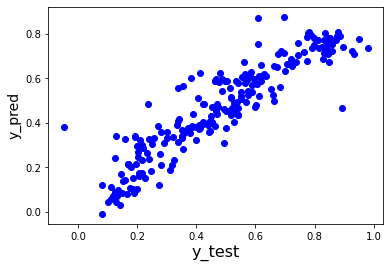

In [37]:
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('y_test', fontsize=16)                          
plt.ylabel('y_pred', fontsize=14)                          

Note :45 degree linear trend between y_test and y_pred implies an good model with minimal outliers

<AxesSubplot:xlabel='count'>

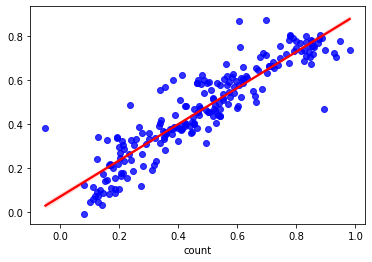

In [38]:
#Regression plot
sns.regplot(x=y_test, y=y_pred, ci=60, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Inferences from the model

1)temp is significant variable with a coefficient of .4847, So temp conditions sould be monitored and service provisions should be made by boom bikes accordingly.As it is positively correlated increase in temperature increases bike demand

2)Weather conditions like light snow reduce demand drastically, so weather forecasting should be considered by the company to manage surge and slump in demand

2)Year on year trend points to upward trend which implies general business demand conditions are improving and any investment decisions can be made in future and business growth oppurtunities should be explored.